In [5]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import random
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from itertools import product
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
import math
import re
import cv2
import sys
sys.path.append(os.path.dirname(os.getcwd()))
from scripts.visualization_helpers import *

In [8]:
train_arrays = glob.glob('/data/scratch/sarperyurtseven/dataset/NIRCAM/1386/injections/fc5_train/*fc5.npy')[:25]

In [10]:
locations        = get_psf_info(train_arrays)
info             = get_augmentation_info(train_arrays)
transformed_list = do_transformations(info, locations)
arrays           = get_array(train_arrays)

Set OBSGEO-B to    16.052288 from OBSGEO-[XYZ].
Set OBSGEO-H to 1528813205.103 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -35.230546 from OBSGEO-[XYZ].
Set OBSGEO-H to 1706565464.343 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -35.237096 from OBSGEO-[XYZ].
Set OBSGEO-H to 1706624079.897 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -35.249661 from OBSGEO-[XYZ].
Set OBSGEO-H to 1706736692.634 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Distance: 7.0710678118654755
Distance: 30.479501308256342
Distance: 17.26267650163207
Distance: 9.0
Distance: 18.027756377319946
Distance: 15.0
Distance: 8.06225774829855
Distance: 5.0
Distance: 12.727922061357855
Distance: 27.202941017470888
Distance: 26.1725046566048
Distance: 25.0
Distance: 18.027756377319946
Distance: 18.439088914585774
Distance: 15.033296378372908
Distance: 15.524174696260024
Distance: 6.4031242374328485
Distance: 24.020824298928627
Distance: 14.0
Distance: 9.848857801796104
Distance: 20.223748416156685
Distance: 1.0
Distance: 13.601470508735444
Distance: 19.4164878389476
Distance: 36.069377593742864


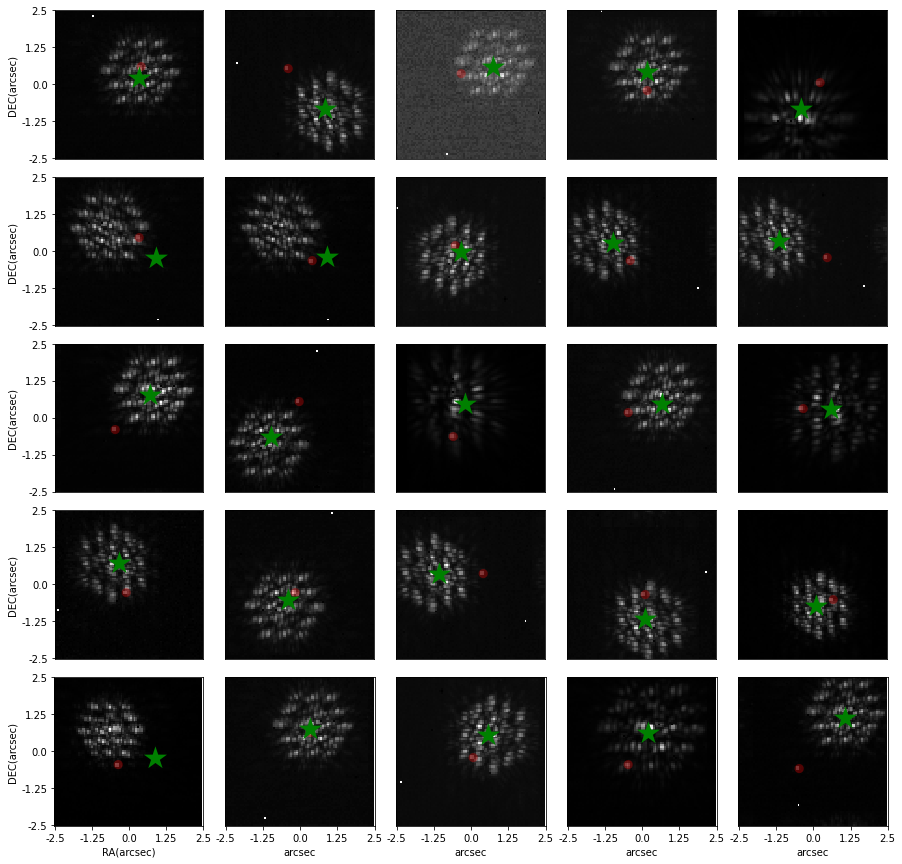

In [11]:
bs = 5
nrows = 5
fig, axes = plt.subplots(nrows=nrows,ncols=bs,figsize=(15,15))

step = 20*0.06259530358142339
step = round(step,2)
labels = step*np.array([-2., -1., 0., 1., 2.])
axis_points = np.linspace(0,80,5)

for i, (row,col) in enumerate(product(range(nrows),range(bs))):

    idx_x  = train_arrays[i].rfind('x')

    if idx_x == -1:
        x, y = 0, 0
    else:
        x = int(train_arrays[i][idx_x+1:idx_x+3])
        y = int(train_arrays[i][idx_x+5:idx_x+7])

    #x, y = int(train_arrays[i].split('/')[-1].split('-')[-3:-1][0][1:]), int(train_arrays[i].split('/')[-1].split('-')[-3:-1][1][1:])
    axes[row][col].imshow(arrays[i], interpolation='nearest', cmap='Greys_r')

    if col == 0:
        axes[row][col].set_yticks(axis_points,labels, fontsize=10, rotation=0)
        axes[row][col].set_ylabel('DEC(arcsec)', fontsize=10)
        
        if row == 4:
            axes[row][col].set_xticks(axis_points,labels, fontsize=10, rotation=0)
            axes[row][col].set_xlabel('RA(arcsec)', fontsize=10)

        else:
            axes[row][col].set_xticks([])

    elif row == 4:
        axes[row][col].set_xticks(axis_points,labels, fontsize=10, rotation=0)
        axes[row][col].set_xlabel('arcsec', fontsize=10)
        axes[row][col].set_yticks([])

    else:
        axes[row][col].set_yticks([])
        axes[row][col].set_xticks([])


    axes[row][col].text(x, y, s="\u25CF", fontsize=12, color='red', alpha=.3, ha='center', va='center')#u"\u2734"
    axes[row][col].invert_yaxis()

    
    if int(transformed_list[i][0]) == -1:
        pass
    else:
        axes[row][col].text(int(transformed_list[i][0]), int(transformed_list[i][1]) , s="\u2605", fontsize=30, color='green', ha='center', va='center')
    
    print("Distance:",calculate_distance(x1=x,x2=int(transformed_list[i][0]), y1=y,y2=int(transformed_list[i][1])))
    
plt.subplots_adjust(wspace=.12,hspace=.12)
#plt.savefig('figure.jpg',format='jpg', dpi=300, bbox_inches='tight', pad_inches=.1)
plt.show()